# Udacity Project 5: Communicate Data Findings 

## Dataset: Loan Data from prosper

## by Aisulu Raganina

## Preliminary Wrangling

The dataset contains 113937 entries. Each row includes infomation on the loan status, employment status, borrow's APR, Loan original amount,  etc. This investigation will be analyzing the factors which effect a loan’s status (Completed or Defaulted).

In [56]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [57]:
loan = pd.read_csv('prosperLoanData.csv')

In [58]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [59]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [60]:
#Subset the df by columns of interest
cols = ['LoanStatus', 'EmploymentStatus','StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate', 'LoanOriginalAmount', 'ProsperRating (Alpha)' ]
loan_sub=loan[cols]
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 7 columns):
LoanStatus               113937 non-null object
EmploymentStatus         111682 non-null object
StatedMonthlyIncome      113937 non-null float64
BorrowerAPR              113912 non-null float64
BorrowerRate             113937 non-null float64
LoanOriginalAmount       113937 non-null int64
ProsperRating (Alpha)    84853 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 6.1+ MB


In [61]:
#Missing values idfentified
loan_sub.isnull().sum().sum()

31364

In [62]:
loan_sub = loan_sub.dropna()
loan_sub.isnull().sum().sum()

0

In [63]:
#Number of duplicated data entries
sum(loan_sub.duplicated())

8130

In [64]:
loan_sub = loan_sub.drop_duplicates()
sum(loan_sub.duplicated())

0

In [65]:
#Rename the column  ProsperRating (Alpha) to ProsperRating
loan_sub.rename(columns={'ProsperRating (Alpha)':'ProsperRating'}, inplace = True)

In [66]:
loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76723 entries, 1 to 113936
Data columns (total 7 columns):
LoanStatus             76723 non-null object
EmploymentStatus       76723 non-null object
StatedMonthlyIncome    76723 non-null float64
BorrowerAPR            76723 non-null float64
BorrowerRate           76723 non-null float64
LoanOriginalAmount     76723 non-null int64
ProsperRating          76723 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 4.7+ MB


In [67]:
loan_sub.describe()

,StatedMonthlyIncome,BorrowerAPR,BorrowerRate,LoanOriginalAmount
count,7.672300e+04,76723.000000,76723.00000,76723.000000
mean,6.025172e+03,0.224253,0.19382,9077.128710
std,8.610503e+03,0.078926,0.07374,6303.609813
min,0.000000e+00,0.045830,0.04000,1000.000000
25%,3.493750e+03,0.162940,0.13550,4000.000000
50%,5.000000e+03,0.216530,0.18640,7500.000000
75%,7.291667e+03,0.287800,0.25240,13000.000000
max,1.750003e+06,0.423950,0.36000,35000.000000


### What is the structure of your dataset?

The data which was used is prosperLoanData.csv. The initial data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

For simplicity of the visualization I have looked at only a few variables. After filtering the dataset for the variables of our interest and cleaning from the missing values and duplicates, the dataframe consists of 76723 entries and 7 columns: LoanStatus, EmploymentStatus, StatedMonthlyIncome, BorrowerAPR, BorrowerRate, LoanOriginalAmount, ProsperRating.

### What is/are the main feature(s) of interest in your dataset?

In this project, I want to investigate the best predictor for the LoanStatus-Completed and Defaulted.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the Employment Status and the State Monthly Income would have a positive effect on the Loan Status 'Completed'. The effect of Loan Original Amount on the LoanStatus is expected to have a strong relationship. It is also interesting to investigate the effect of the BorrowerAPR, BorrowerRate and ProsperRating.

In [68]:
loan_sub.LoanStatus.value_counts()

Current                   49777
Completed                 18784
Chargedoff                 4931
Defaulted                   990
Past Due (1-15 days)        793
Past Due (31-60 days)       359
Past Due (61-90 days)       308
Past Due (91-120 days)      301
Past Due (16-30 days)       262
FinalPaymentInProgress      202
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

## Univariate Exploration

> In this section, I will investigate the variables of my interest individually. 

#### Check the Loan Status.

Text(0,0.5,'count')

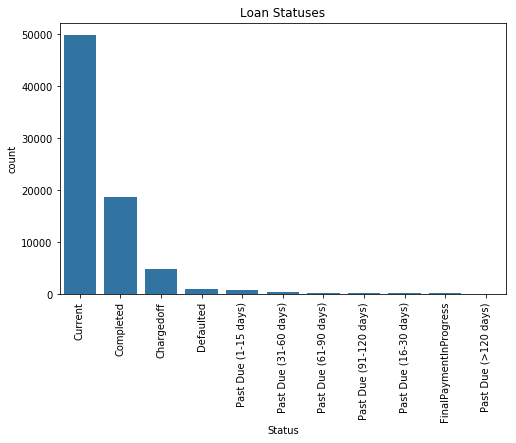

In [69]:
# To check the Loan Status
plt.figure(figsize=[8,5])
status_order = loan_sub['LoanStatus'].value_counts().index
b_color= sb.color_palette()[0]
sb.countplot(data = loan_sub, x='LoanStatus', color=b_color, order =status_order)
plt.xticks(rotation=90)
plt.title('Loan Statuses')
plt.xlabel('Status')
plt.ylabel('count')

In [70]:
#Prepare the relevant information for the pie chart
loan_sub = loan_sub.loc[~loan_sub['LoanStatus'].isin(['Current'])]
Total = loan_sub['LoanStatus'].value_counts().sum()
Current = loan_sub[loan_sub['LoanStatus']== 'Current'].shape[0] *100/Total
Completed = loan_sub[loan_sub['LoanStatus']== 'Completed'].shape[0]  *100/Total
Chargedoff = loan_sub[loan_sub['LoanStatus']== 'Chargedoff'].shape[0]  *100/Total
Defaulted = loan_sub[loan_sub['LoanStatus']== 'Defaulted'].shape[0]  *100/Total
PastDue = loan_sub[(loan_sub['LoanStatus'] == 'Past Due (1-15 days)') | 
                 (loan_sub['LoanStatus'] == 'Past Due (31-60 days)') |
                 (loan_sub['LoanStatus'] == 'Past Due (61-90 days)') | 
                 (loan_sub['LoanStatus'] == 'Past Due (91-120 days)') |
                 (loan_sub['LoanStatus'] == 'Past Due (16-30 days)') | 
                 (loan_sub['LoanStatus'] == 'FinalPaymentInProgress') |
                 (loan_sub['LoanStatus'] == 'Past Due (>120 days)')].shape[0]  *100/Total
loan_sub.LoanStatus.value_counts()

Completed                 18784
Chargedoff                 4931
Defaulted                   990
Past Due (1-15 days)        793
Past Due (31-60 days)       359
Past Due (61-90 days)       308
Past Due (91-120 days)      301
Past Due (16-30 days)       262
FinalPaymentInProgress      202
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

Text(0.5,1,'Loan Statuses')

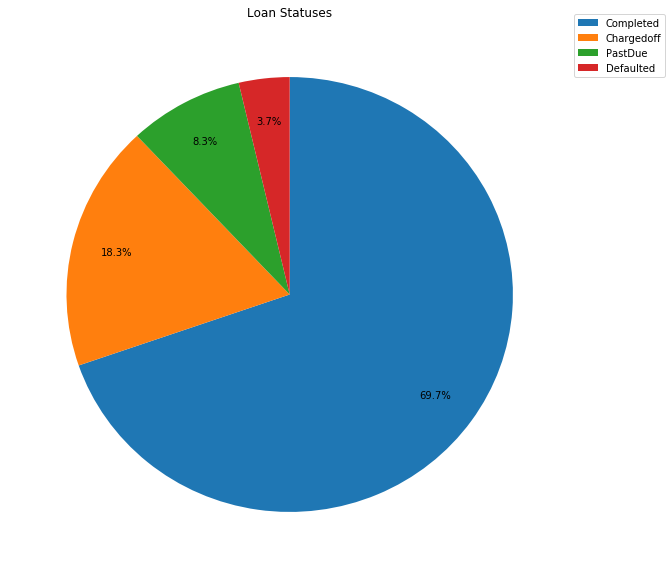

In [71]:
#Plot the pie chart for the loan status only for Completed, Chargedoff, Defaulted and with the PastDue
plt.figure(figsize=[10,10])
status_order = [Completed, Chargedoff, PastDue, Defaulted]
labels = [ 'Completed', 'Chargedoff', 'PastDue', 'Defaulted']
plt.pie(status_order, startangle = 90, counterclock= False, autopct='%1.1f%%', pctdistance=0.8)  
plt.legend(labels, loc="best", bbox_to_anchor=(1,1.025))
plt.title('Loan Statuses')

> Excluding the loans with status Current, there are 69.7% loans with status 'Completed' and only 3.6% with status 'Defaulted'. The number of completed cases is higher than others. 

#### Check the Employment Status.

Text(0.5,1,'Employment Status')

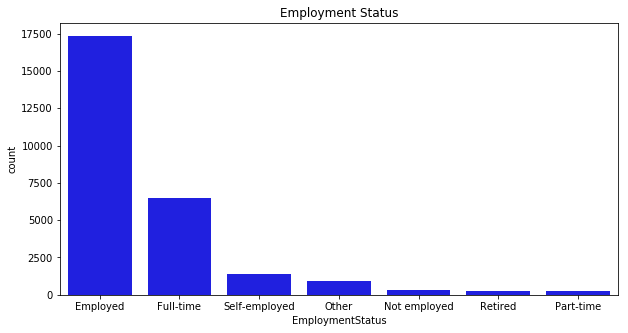

In [72]:
plt.figure(figsize=[10,5])
order = loan_sub['EmploymentStatus'].value_counts().index
sb.countplot(data = loan_sub, x= 'EmploymentStatus', order = order, color = 'blue')
plt.title('Employment Status')

> According to the graph above, most of the loan takers are Employed and Full-time employed.

#### Check the distribution of the Stated Monthly Income.

In [73]:
#It seems that the data has outliers
loan_sub.StatedMonthlyIncome.describe()

count     26946.000000
mean       5534.869709
std        6758.300905
min           0.000000
25%        3166.666667
50%        4583.333333
75%        6704.791667
max      618547.833333
Name: StatedMonthlyIncome, dtype: float64

[]

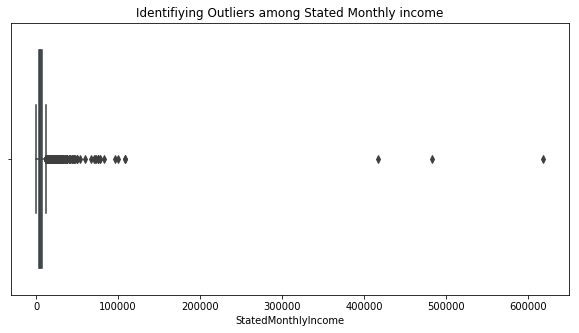

In [74]:
#Identifiyng outliers
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
plt.figure(figsize=[10,5])
sb.boxplot(x=loan_sub['StatedMonthlyIncome'])
plt.title('Identifiying Outliers among Stated Monthly income')
plt.plot()

<Container object of 3 artists>

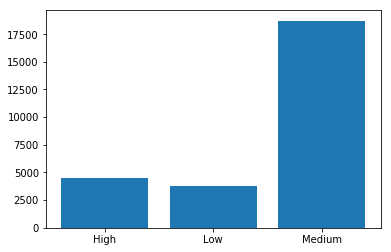

In [75]:
def classify(row):
    if row["StatedMonthlyIncome"]<2500:
        return 'Low'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium'
    else:
        return 'High'
    
loan_sub["WageBracket"] = loan_sub.apply(classify, axis=1);
plt.bar(loan_sub["WageBracket"].value_counts().index,loan_sub["WageBracket"].value_counts())

Text(0,0.5,'Count')

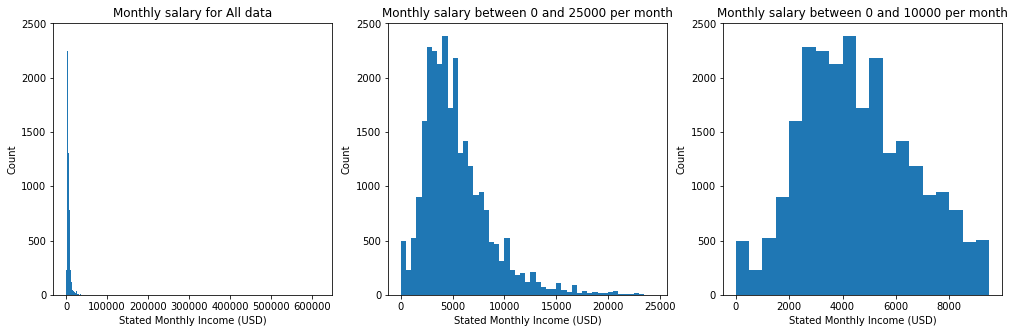

In [76]:
# Playng with the bins, i found out the the distribution of the StateMonthlyIncome for all data is right skewed distribution
# When we want to take a look only to the group of which salary is less than 10000, 
# the distribution look normal with a pick at around 4000 (Average salary)
plt.figure(figsize=[17,5])

plt.subplot(1,3,1)
bins = np.arange(0, 618548, 500)
plt.hist(data =  loan_sub, x= 'StatedMonthlyIncome', bins = bins)
plt.title('Monthly salary for All data')
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count')

plt.subplot(1,3,2)
bins = np.arange(0, 25000, 500)
plt.hist(data =  loan_sub, x= 'StatedMonthlyIncome', bins = bins)
plt.title('Monthly salary between 0 and 25000 per month')
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count')

plt.subplot(1,3,3)
bins = np.arange(0, 10000, 500)
plt.hist(data =  loan_sub, x= 'StatedMonthlyIncome', bins = bins)
plt.title('Monthly salary between 0 and 10000 per month')
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Count')



> The Stated Monthly Income is between a min 0 and max 618547 salary range per month. The distribution is right skewed with the mean 5534 and the standard deviation  6758. However, due to the outliers which are presented with the high salaries and based on the bar chart above, we can see that most of the loan payers are in the Medium group with a salary per month from 2500 to 8000. Additionally, there is a normal distribution for a range between 0 and 10000 US Dollars per month.

#### Check the distribution of  Loan Original Amount,  Borrower APR and   Borrower Rate.

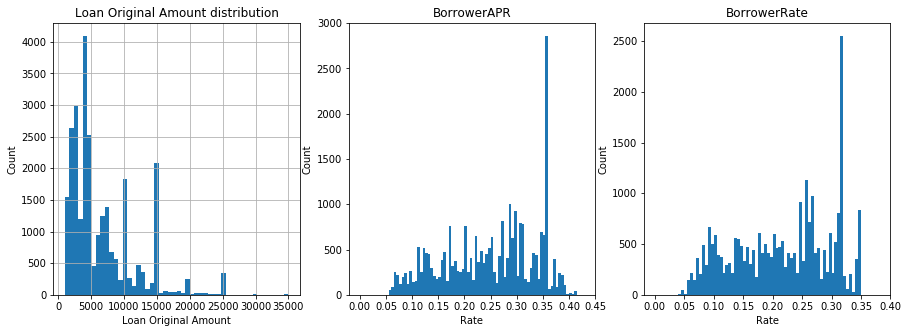

In [77]:
plt.figure(figsize=[15,5])
# Loan Original Amount distribution is right skewed
plt.subplot(1,3,1)
loan_sub.LoanOriginalAmount.hist(bins = 50)
plt.title('Loan Original Amount distribution')
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')

# BorrowerAPR distribution 
plt.subplot(1,3,2)
bins = np.arange(0, loan_sub['BorrowerAPR'].max(), 0.005)
plt.hist(data =  loan_sub, x= 'BorrowerAPR', bins =bins)
plt.title('BorrowerAPR')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.xticks(np.arange(0, loan_sub['BorrowerAPR'].max()+0.05, 0.05));

# BorrowerRate distribution
plt.subplot(1,3,3)
bins = np.arange(0, loan_sub['BorrowerRate'].max(), 0.005)
plt.hist(data =  loan_sub, x= 'BorrowerRate', bins =bins)
plt.title('BorrowerRate')
plt.xlabel('Rate')
plt.ylabel('Count')
plt.xticks(np.arange(0, loan_sub['BorrowerRate'].max()+0.05, 0.05));

> The Loan Original Amount has a right skewed distribution with the peak at around 4800.
The  Borrower APR  and the Borrower Rate show slightly left skewed distributions with the second spike at 0.37 for Borrower APR and at 0.32 for Borrower Rate.  
Interestingly, the shape of the Borrower APR and Borrower Rate distributions share some similarities.  It's likely that two  variables will be correlated with one another.

#### Check the  Prosper Rating 

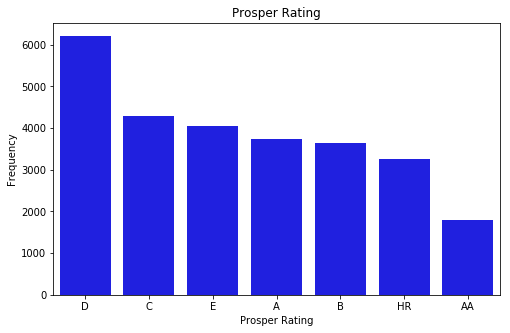

In [78]:
# ProsperRating (Alpha):  (0 - N/A)  1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA
# https://www.lendacademy.com/prosper-review/
plt.figure(figsize=[8,5])
order = loan_sub['ProsperRating'].value_counts().index
sb.countplot(data = loan_sub, x= 'ProsperRating', order = order, color = 'blue')
plt.title('Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Frequency');

> Prosper Rating shows that there are less loans with the lowest risk AA and just above 3500 loans for the highest risk rate HR. The most of the loans are with Rating D. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Loan Status has a high number of current loans as well as high percentage of the completed loans. The distribution of employment shows that the high percentage of the loan takers do have a full-time job or/and Employed. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The variable of interest Loan Status had a very high number of Current loans which was excluded. The goal is to find what effects Completed and Defaulted loans in order to predict the good cases. 

Additionally, variable Stated Monthly Income showed the very right skewed distribution of the monthly salary which can be explained with a few high salaries as outliers. However, the most of the salaries are in the range between 0 and 10000 which  has a normal distribution.


The shape of the Borrower APR and Borrower Rate distributions share some similarities. It's likely that two variables will be correlated with one another.

## Bivariate Exploration

#### Check Loan Status and Emploament Status (ql vs ql)

Text(0,0.5,'Loan Status')

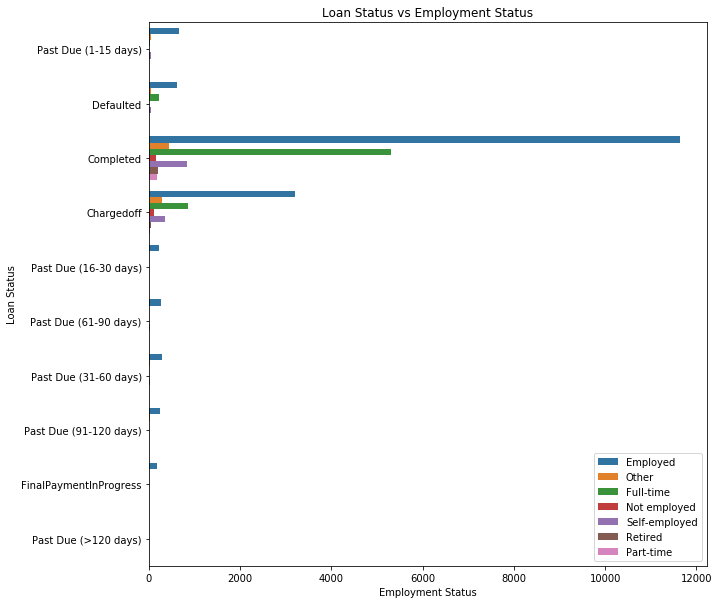

In [79]:
#LoanStatus vs EmploymentStatus - COUNTPLOT
plt.figure(figsize=[10,10])
sb.countplot(data = loan_sub, y='LoanStatus', hue='EmploymentStatus')
plt.legend(loc='lower right')
plt.title('Loan Status vs Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Loan Status')

> When we investigate the relationship between Loan Status and Employment Status, we can see that only Employed customers show the status as Past Due. It may be due to the postponed Salary. The Status to be Employed also shows a very outstanding level of the loan completion as well as Full-Time employed status. 

#### Loan Status and Stated Monthly Income (ql vs qt) and 
#### Loan status and  Loan Original Amount  (ql vs qt)

In [80]:
# filtereing Loan Status for the Completed and Defaulted and without outliers for the monthly salary
loan_sub = loan_sub[(loan_sub['LoanStatus'] == 'Completed') | 
                    (loan_sub['LoanStatus'] == 'Defaulted')]
loan_sub =loan_sub.loc[loan_sub['StatedMonthlyIncome'] <= 10000]

Text(0.5,0,'Loan Status')

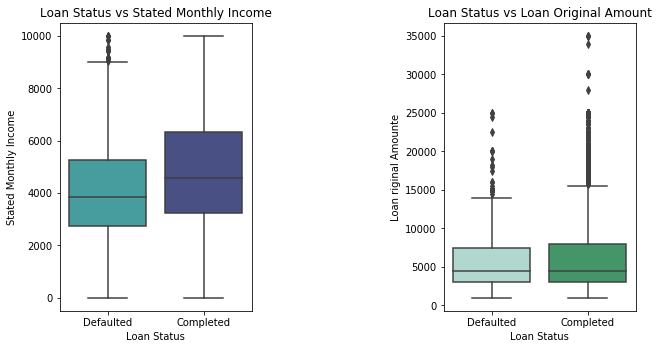

In [81]:
plt.figure(figsize=[10,5])

#LoanStatus vs StatedMonthlyIncome - BOXPLOT
plt.subplot(1,2,1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9 , wspace=1, hspace=0.2)
sb.boxplot(data = loan_sub, x='LoanStatus', y='StatedMonthlyIncome', palette = 'mako_r')
plt.title('Loan Status vs Stated Monthly Income')
plt.ylabel('Stated Monthly Income')
plt.xlabel('Loan Status')

#LoanStatus vs LoanOriginalAmount   - BOXPLOT
plt.subplot(1,2,2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9 , wspace=1, hspace=0.2)
sb.boxplot(data = loan_sub, x='LoanStatus', y='LoanOriginalAmount', palette= 'BuGn')
plt.title('Loan Status vs Loan Original Amount')
plt.ylabel('Loan riginal Amounte')
plt.xlabel('Loan Status')

Text(0.5,0,'Loan Status')

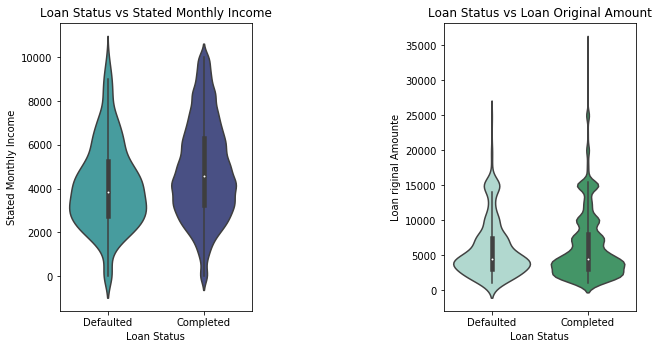

In [82]:
plt.figure(figsize=[10,5])

#LoanStatus vs StatedMonthlyIncome - VIOLINPLOT
plt.subplot(1,2,1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9 , wspace=1, hspace=0.2)
sb.violinplot(data = loan_sub, x='LoanStatus', y='StatedMonthlyIncome', palette = 'mako_r')
plt.title('Loan Status vs Stated Monthly Income')
plt.ylabel('Stated Monthly Income')
plt.xlabel('Loan Status')

#LoanStatus vs LoanOriginalAmount - VIOLINPLOT
plt.subplot(1,2,2)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9 , wspace=1, hspace=0.2)
sb.violinplot(data = loan_sub, x='LoanStatus', y='LoanOriginalAmount', palette= 'BuGn')
plt.title('Loan Status vs Loan Original Amount')
plt.ylabel('Loan riginal Amounte')
plt.xlabel('Loan Status')


> According to the box plots with Stated Monthly Income, we see that the mean of Completed Loans is slightly higher than  the Defaulted, while the original loan amount does not show the differences beetween means of two groups.

> According to the violin plots, both groups Completed and Defaulted refer to the Loans with original amount less than 5000  and higher for the Stated monthly Salary between  2000 and 6000. 

#### Loan Status vs Prosper Rating (ql vs ql)

Text(0.5,1,'Prosper Rating')

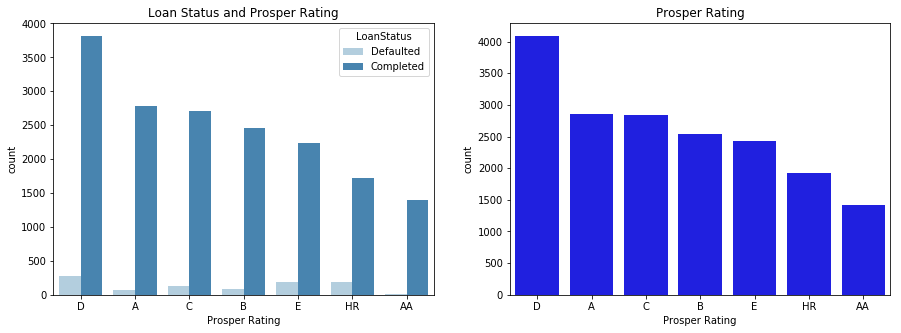

In [83]:
#LoanStatus vs ProsperRating - COUNTPLOT
# 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
order = loan_sub['ProsperRating'].value_counts().index
sb.countplot(data = loan_sub, x='ProsperRating', hue='LoanStatus', palette= 'Blues', order = order)
plt.xlabel('Prosper Rating')
plt.title('Loan Status and Prosper Rating')

plt.subplot(1,2,2)
order = loan_sub['ProsperRating'].value_counts().index
sb.countplot(data = loan_sub, x= 'ProsperRating', order = order, color = 'blue')
plt.xlabel('Prosper Rating')
plt.title('Prosper Rating')

> According to the above plots, we can see that only a few borrowers have defaulted loans with a Prosper Rating of AA (lowest risk), while the proportion of defaulted loans in the rating groups HR, E and D (high risk groups)  are significantly higher. On the other hand, the highest number of Completed loans also is in the Rating group D. 


#### Stated Monthly Income vs Loan Original Amount  (qt vs qt)

Text(0,0.5,'Stated Monthly Income')

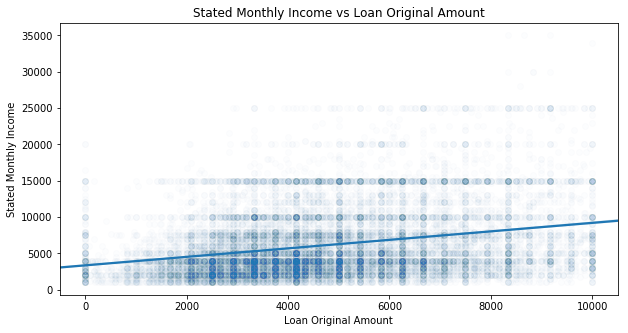

In [84]:
#StatedMonthlyIncome vs LoanOriginalAmount - REGPLOT
plt.figure(figsize=[10,5])
sb.regplot(data = loan_sub, x= 'StatedMonthlyIncome', y= 'LoanOriginalAmount', scatter_kws={'alpha':0.01})
plt.title('Stated Monthly Income vs Loan Original Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Stated Monthly Income')

>The Stated Monthly Income and Loan Original Amount shows a positive correlation.

####  Loan Status and Borrower APR  (ql vs qt)

Text(0,0.5,'Borrower APR')

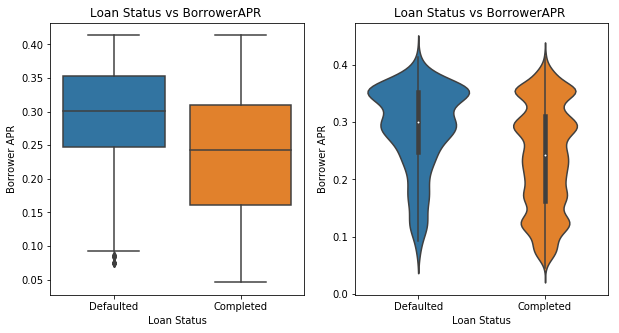

In [85]:
#LoanStatus vs BorrowerAPR - BOXPLOT and VIOLINPLOT
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sb.boxplot(data = loan_sub, x='LoanStatus', y='BorrowerAPR')
plt.title('Loan Status vs BorrowerAPR ')
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')

plt.subplot(1,2,2)
sb.violinplot(data = loan_sub, x='LoanStatus', y='BorrowerAPR')
plt.title('Loan Status vs BorrowerAPR ')
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')


> The mean of the Defaulted loans is higher than for the Completed. The most of the loans which were defaulted have Borrower APR higher than 0.25. Conclusively, the higher the Borrower APR, the higher is the possibility for Defaulted loan. On the other hand, from the violinplot we can see that the Completed cases are evenly distributed for the Borrower APR between 0.1 and 0.35 with the mean at 0.25.

####  Loan Status and  Borrower Rate  (ql vs qt)

Text(0,0.5,'Borrower Rate')

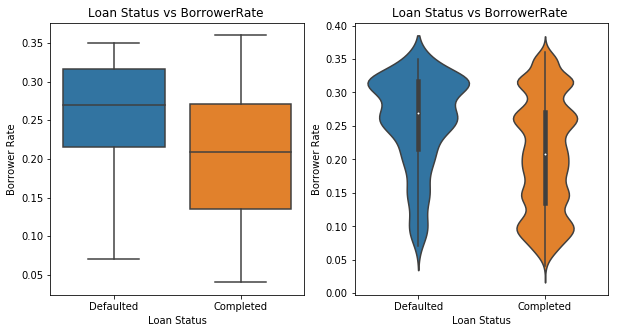

In [86]:
#LoanStatus vs BorrowerRate - BOXPLOT and VIOLINPLOT
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sb.boxplot(data = loan_sub, x='LoanStatus', y='BorrowerRate')
plt.title('Loan Status vs BorrowerRate ')
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')

plt.subplot(1,2,2)
sb.violinplot(data = loan_sub, x='LoanStatus', y='BorrowerRate')
plt.title('Loan Status vs BorrowerRate ')
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')


> The mean of the Defaulted loans is also higher than for the Completed. The most of the loans which were defaulted have the Borrower rate higher than 0.20. Conclusively, the higher the Borrower Rate, the higher is the possibility for a Defaulted loan. On the other hand, from the violinplot we can see that the Completed cases are also evenly distributed for the Borrower Rate between 0.08 and 0.32 with the mean at 0.21.

#### Borrower APR and Borrower Rate (qt vs qt)

Text(0,0.5,'Borrower Rate')

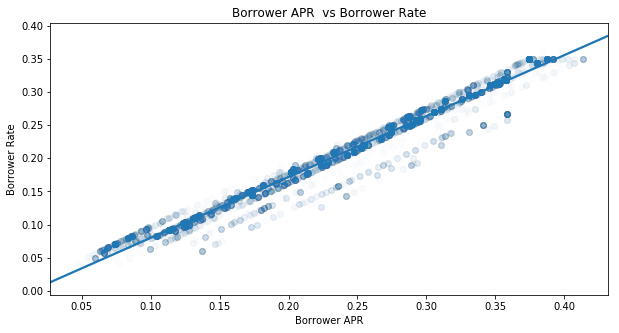

In [87]:
# Borrower APR and Borrower Rate - REGPLOT
plt.figure(figsize=[10,5])
sb.regplot(data = loan_sub, x= 'BorrowerAPR', y= 'BorrowerRate', scatter_kws={'alpha':0.01})
plt.title('Borrower APR  vs Borrower Rate')
plt.xlabel('Borrower APR')
plt.ylabel('Borrower Rate')

> As expected, the Borrower APR  and Borrower Rate show a strong positive correlation.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Employment Status does effect the Loan status: the Employed and Full-time statuses cover most of the Completed loans. On the other hand the Post due status for loans also includes the Employed group.

The mean Stated income of loans with status Completed is slightly higher than for the Defaulted. 

The original loan amount shows no differences for the mean of two groups: Completed and Defaulted.

Prosper Rating shows effect on the Loan Status: the highest Prosper Rating AA only shows a few defaulted than lower Prosper rating groups. The most of the Completed loans have the rating D.

The higher Borrower APR and/or Borrower Rate, the higher the percentage of the defaulted loans.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

We found a positive correllation between  Stated Monthly Income and Loan Original Amount as well as between Borrower APR and Borrower Rate. 


## Multivariate Exploration

#####  Loan Status, Employment Status and Stated Monthly Income (ql vs ql vs qt) 

Text(0.5,1,'Loan Status, Employment Status and  Monthly Income')

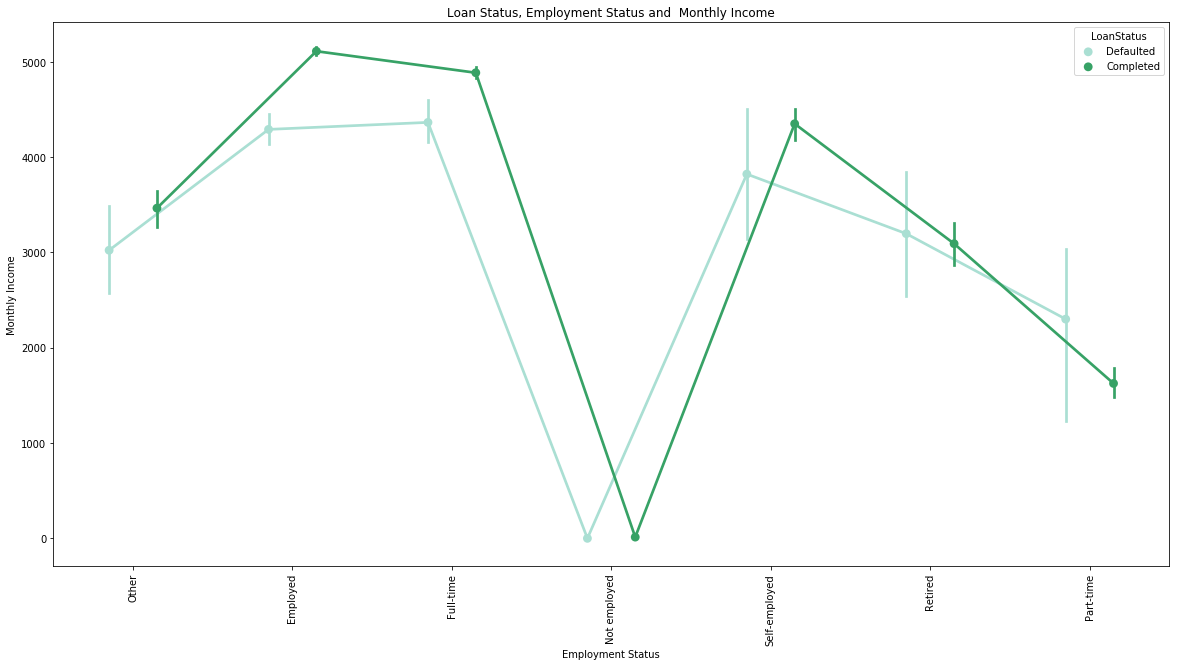

In [88]:
#LoanStatus vs EmploymentStatus vs StatedMonthlyIncome- POINTPLOT
#https://towardsdatascience.com/data-visualization-using-seaborn-fc24db95a850
plt.figure(figsize=[20,10])
sb.pointplot(data = loan_sub, x='EmploymentStatus', y='StatedMonthlyIncome', hue='LoanStatus', 
             dodge=0.3, linestyles= "-", palette = 'BuGn')
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Monthly Income')
plt.title('Loan Status, Employment Status and  Monthly Income')

> We can see that the top 3 Employment Statuses are Employed, Full-time and Self-Employed show the highest number of Completed as well as Defaulted loans. The data sharply fell for both Completed and Defaulted for the Not Employed which can be explained by that the loans preferably should not be given for unemployed customers.

##### Loan Status,  Employment Status and  Loan Original Amount (ql vs qt vs ql)

Text(0.5,1,'LoanStatus vs EmploymentStatus vs LoanOriginalAmount')

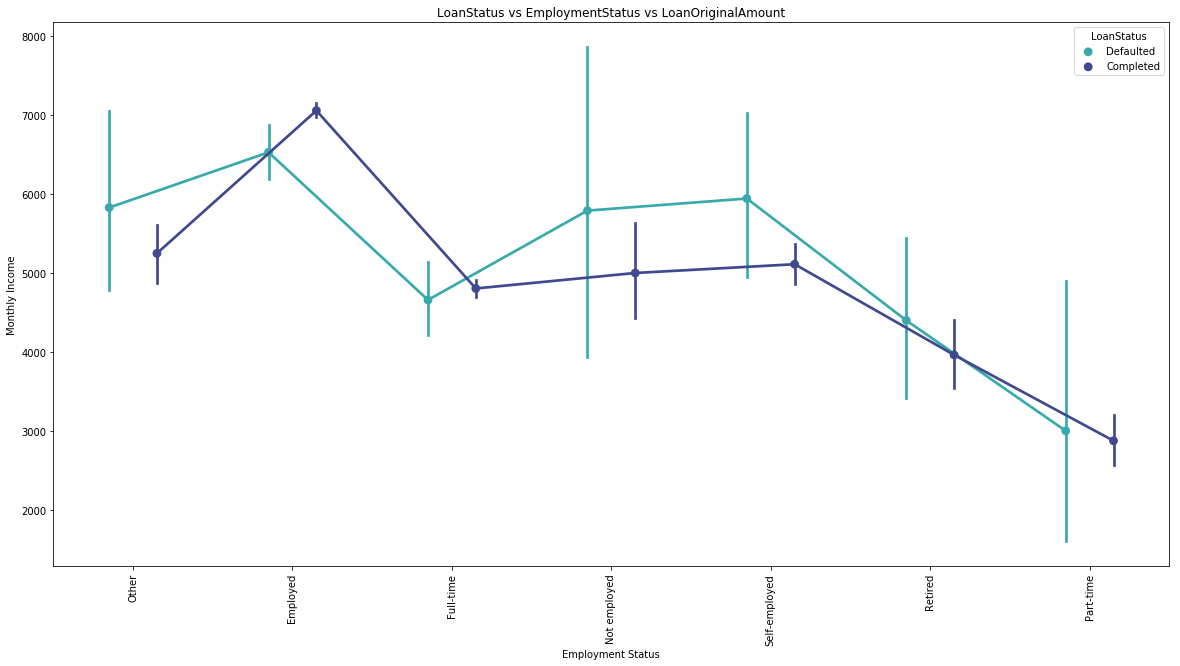

In [89]:
#LoanStatus vs EmploymentStatus vs LoanOriginalAmount - POINTPLOT
plt.figure(figsize=[20,10])
sb.pointplot(data = loan_sub, x='EmploymentStatus', y='LoanOriginalAmount', hue='LoanStatus', dodge=0.3, linestyles= "-", palette = 'mako_r')
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Monthly Income')
plt.title('LoanStatus vs EmploymentStatus vs LoanOriginalAmount')

>The Employed Status group shows that even with the high Loan original amount as 7000 the loans are completed, while we can observe that for other groups of employments the higher the Loan Amount - the higher the Defaulted cases.

#### Loan Status, Stated Monthly Income and Loan Original Amount (ql vs qt vs qt)  

Text(28.7235,0.5,'Loan Original Amount')

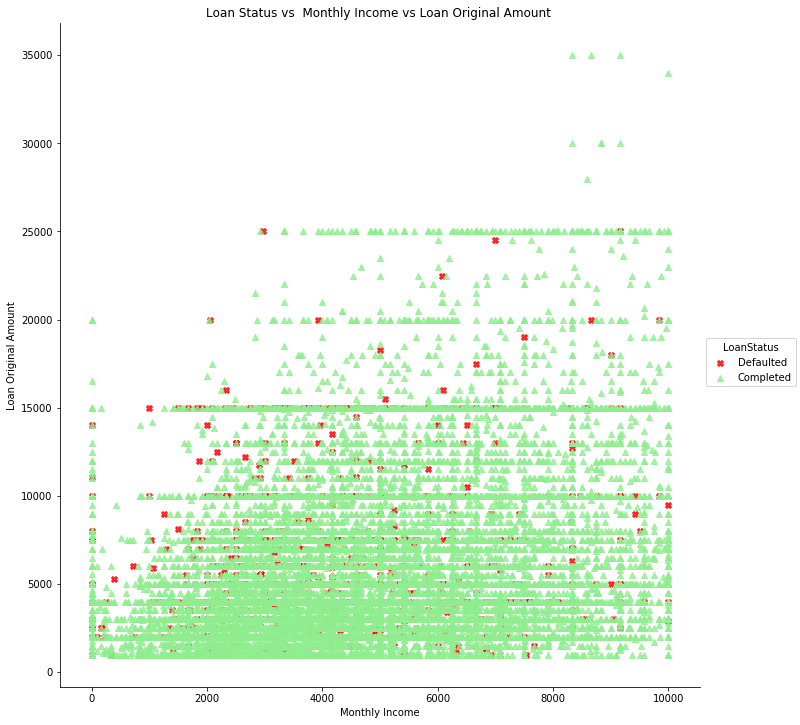

In [90]:
#LoanStatus vs StatedMonthlyIncome vs LoanOriginalAmount - LMPLOT
#https://www.kaggle.com/residentmario/multivariate-plotting
#https://seaborn.pydata.org/generated/seaborn.lmplot.html
palette = [ 'r', 'lightgreen']
sb.lmplot(x='StatedMonthlyIncome', y='LoanOriginalAmount', hue='LoanStatus', 
           data=loan_sub.loc[loan_sub['LoanStatus'].isin(['Completed', 'Defaulted'])], size=10, markers=['X', '^'], palette=palette,
           fit_reg=False)
plt.title('Loan Status vs  Monthly Income vs Loan Original Amount ')
plt.xlabel('Monthly Income', fontsize=10)
plt.ylabel('Loan Original Amount', fontsize=10)

> According to the graph above, we can see that the most of the Defaulted loans have less than 15000 Original Loan Amount and less than 7000 Monthly salary. However, the most of the Completed loans are also in the range between 2000 and 5000 monthly Salary and with less than 15000 Loan Amount.

#### Borrower APR, Stated Monthly Income and Loan Original Amount (qt vs qt vs qt)

In [91]:
#Borrower APR vs StatedMonthlyIncome vs LoanOriginalAmount- CORRELATION
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f - Formatting Tips for Correlation Heatmaps in Seaborn
loan_sub_m = loan_sub[["BorrowerAPR", "StatedMonthlyIncome", "LoanOriginalAmount"]]
loan_sub_m.corr()

,BorrowerAPR,StatedMonthlyIncome,LoanOriginalAmount
BorrowerAPR,1.000000,-0.177891,-0.247856
StatedMonthlyIncome,-0.177891,1.000000,0.279661
LoanOriginalAmount,-0.247856,0.279661,1.000000


(array([ 0.5,  1.5,  2.5]), <a list of 3 Text yticklabel objects>)

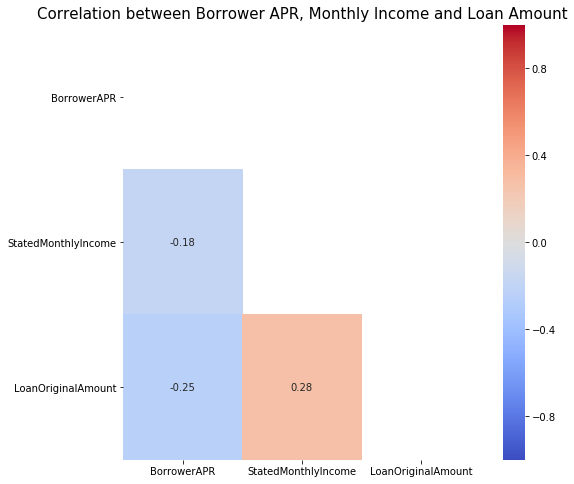

In [92]:
#Borrower APR vs StatedMonthlyIncome vs LoanOriginalAmount- HEATMAP
plt.figure(figsize=[8,8])

mask = np.zeros(loan_sub_m.corr().shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True

sb.heatmap(loan_sub_m.corr(), annot=True,cmap='coolwarm', vmin = -1, vmax = 1, center = 0, mask=mask)
plt.title('Correlation between Borrower APR, Monthly Income and Loan Amount', fontsize=15, )

plt.yticks(rotation = 0)

> There is a negative correlation of  -0.25 between "BorrowerAPR" and "Loan original amount" and -0.18 between "BorrowerAPR"  and "StatedMonthlyIncome". 

> As we have also seen from Bivariate Exploratrion, "Loan original amount" and "StatedMonthlyIncome" have a positive correlation which is 0.28.

#### Loan Status,  ProsperRating and Borrower APR (ql vs ql vs qt)

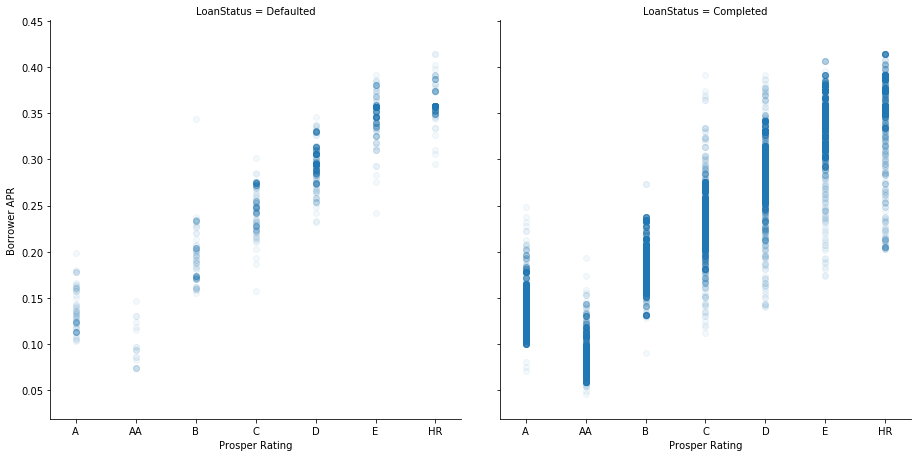

In [93]:
#LoanStatus vs ProsperRating (Alpha) vs Borrower APR - FACETGRID
#https://towardsdatascience.coxm/data-visualization-using-seaborn-fc24db95a850
#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sb.FacetGrid(data=loan_sub, col='LoanStatus', col_wrap=3)
g = (g.map_dataframe(plt.scatter, 'ProsperRating','BorrowerAPR' ,  alpha=0.05).set_axis_labels('Prosper Rating', 'Borrower APR'))
g.fig.set_size_inches(20,8)

> According to the graphs above, there are less Defaulted cases for the Prosper Rating AA with the Borrower APR around 0.1. 
We also can observe for the Rating HR - the highest risk - that nevertheless the most of the loans are Completed, there are few Defaulted


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The top 3 Employment Statuses are Employed, Full-time and Self-Employed which show the highest number of Completed.

The most of the Defaulted loans are those with the Original Loan Amount less than 15000 and with the Stated Monthly Salary less than 7000. 

The most of the Completed loans are also in the range between 2000 and 5000 monthly Salary and with less than 15000 Loan Amount.

We also can see that "Loan original amount" and "StatedMonthlyIncome" have a positive correlation which is 0.28.

There is a negative correlation of -0.25 between "BorrowerAPR" and "Loan original amount" and -0.18 between "BorrowerAPR"  and "StatedMonthlyIncome". 

There are less Defaulted cases for the Prosper Rating AA with the Borrower APR around 0.1.
The most popular Prosper Rating is D which include also most of the Completed loans. 

### Were there any interesting or surprising interactions between features?

From the top 3 Employed Statuses, there are more Defaulted loans for the Self-employed. 

For the Rating HR - the highest risk - we also can observe that nevertheless the most of the loans are Completed, there are a few Defaulted cases. 

#### References:
1. https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed  
2. https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f 
3. https://www.lendacademy.com/prosper-review/
4. https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
5. https://seaborn.pydata.org/generated/seaborn.heatmap.html
6. https://towardsdatascience.coxm/data-visualization-using-seaborn-fc24db95a850
7. https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
8. https://www.kaggle.com/residentmario/multivariate-plotting
9. https://seaborn.pydata.org/generated/seaborn.lmplot.html


